# Research assignment 3

Alisha Jones 

GSS Research Assignment  

March 4, 2020

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
  
  - My data will not allow for me to have a dependent varibale that is continuous. Therfore, I will use the GSS (2018) data instead.
   - My dependent vaiable is income. Income is measured in constant dollars. 
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
    - My independent varibales are years on the job and education. 
    - Years of the job is an interval ratio variable because there is a meaningful numerical difference the categories. 
    - Education is also an interval ratio variable because there is a meaningful numerical difference between each year of education. 

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
    - My control variables are age, sex, and race. 
    - Age is a interval ratio varibale because there is a meaningful numerical difference between each age of the respondents. 
    - Sex is a nominal variable and more specifically a dichotomous variable. It is a dichotomous variable because there are only two possible categories. Male and female are considered to be mutually exclusive and exhaustive categories. 
    - Race is a nominal variable becasue the categories are mutually exclusive and exhaustive categories. 

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
    
    - Hypothesis 1: I hypothesize that an individual's income is influenced by their education. The more education that an individual has the more money they make. 
    - More specifically, older White men have higher income. 
  
    - Hypothesis 2: I also hypothesize that the longer an individual is at a job the more income they will make. 
    - More specifically, older White men have higher income. 

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
clear 
set more off 
capture log close using researchassign3log.log 
use "GSS2018w6.dta", clear
keep realrinc yearsjob educ age sex race
describe
codebook








Contains data from GSS2018w6.dta
  obs:         2,348                          
 vars:             6                          26 Feb 2020 09:54
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
age             byte    %8.0g      AGE        Age of respondent
educ            byte    %8.0g      LABK       Highest year of school completed
sex             byte    %8.0g      SEX        Respondents sex
race            byte    %8.0g 

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show

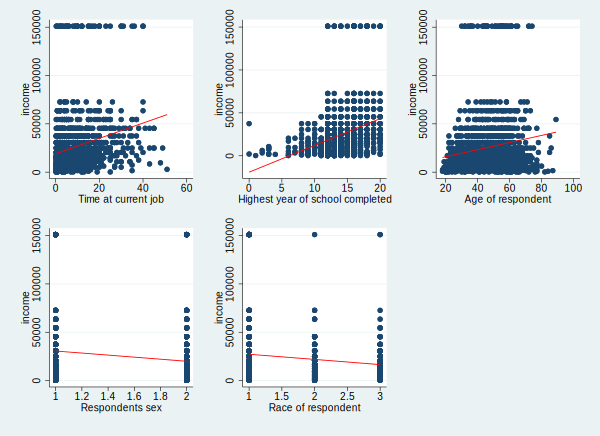

In [2]:
foreach x of var yearsjob educ age sex race {
  quietly graph twoway (scatter realrinc `x') (lfit realrinc `x', color(red)), name(`x', replace) legend(off) ytitle(income) scheme(plotplainblind)
}

graph combine yearsjob educ age sex race, col(3) 

In [ ]:
The scatterplots show that there is a positive correlation between the dependent variable income and years on the job, education, and age. The control varibales sex and race show a negative correlation with the dependent variable income.




## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.

In [3]:
correlate realrinc yearsjob educ age sex race
pwcorr realrinc yearsjob educ age sex race, star(.05) sig


(obs=1,194)

             | realrinc yearsjob     educ      age      sex     race
-------------+------------------------------------------------------
    realrinc |   1.0000
    yearsjob |   0.2605   1.0000
        educ |   0.3121   0.0831   1.0000
         age |   0.1645   0.4720   0.0608   1.0000
         sex |  -0.1892  -0.1023   0.0574  -0.0215   1.0000
        race |  -0.1297  -0.0837  -0.1764  -0.1317   0.0069   1.0000



             | realrinc yearsjob     educ      age      sex     race
-------------+------------------------------------------------------
    realrinc |   1.0000 
             |
             |
    yearsjob |   0.2610*  1.0000 
             |   0.0000
             |
        educ |   0.3081*  0.0907*  1.0000 
             |   0.0000   0.0006
             |
         age |   0.1825*  0.4823* -0.0230   1.0000 
             |   0.0000   0.0000   0.2658
             |
         sex |  -0.1830* -0.0953*  0.0118  -0.0142   1.0000 
             |   0.0000   0.0003   0.56

In [ ]:
The correlation matrix shows that 

- Income and years on the job have a positive weak relationship, and is statistically significant. 
- Income and education have positive weak relationship, and is statistically significant.
- Income and age have a poitive weak relationship, and is statistically significant.
- Income and sex have a negative weak relationship, and is statistically significant.
- Income and race have a negative weak relationship, and is statistically significant.

- Years on the job and education have a weak positive relationship, and is statistically significant.
- Years on the job and age have a moderate positive relationship, and is statistically significant. 
- Years on the job and sex have a weak negative relationship, and is statistically significant. 
- Years on the job and race have a weak negative relationship, and is statistically significant. 

- Education and age have a weak negative relationship. 
- Education and sex have a weak positive relationship. 
- Education and race have a weak negative relationship, and is statistically significant. 

- Age and sex have a weak negative relationship. 
- Age and race have a weak negative relationship, and is statistically significant. 

- Sex and race have a weak positive relationship.

## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    B. Which variables are included in each model
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships

In [ ]:
A. 
Model 1: Test Hypothesis 1
Model 2: Test Hypothesis 2

B. 
The variables included in Model 1: realrinc educ age sex race
The variables included in Model 2: realrinc yearsjob age sex race

C. 
Adding the variables age sex race as controls in both of my models allows me to test the influence of education and years at a job on income separately while holding age, sex, and race. I think this shows a spurious relationship.  


## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

$\hat{realrinc} = \alpha + \beta_1 \cdot educ + \beta_2 \cdot age + \beta_3 \cdot sex + \beta_4 \cdot race + \beta_k \cdot x_4 $

$\hat{realrinc} = \alpha + \beta_1 \cdot yearsjob + \beta_2 \cdot age + \beta_3 \cdot sex + \beta_4 \cdot race + \beta_k \cdot x_4 $

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [4]:

reg realrinc educ age sex race
reg realrinc yearsjob age sex race

est clear

quietly eststo: reg realrinc educ age sex race
quietly eststo: reg realrinc yearsjob age sex race




      Source |       SS           df       MS      Number of obs   =     1,357
-------------+----------------------------------   F(4, 1352)      =     65.78
       Model |  1.8489e+11         4  4.6223e+10   Prob > F        =    0.0000
    Residual |  9.5006e+11     1,352   702708785   R-squared       =    0.1629
-------------+----------------------------------   Adj R-squared   =    0.1604
       Total |  1.1350e+12     1,356   836986258   Root MSE        =     26509

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   3056.742   257.0013    11.89   0.000     2552.577    3560.907
         age |    300.858   50.78145     5.92   0.000      201.239     400.477
         sex |  -11301.48   1445.432    -7.82   0.000    -14137.01   -8465.948
        race |  -2274.604   1055.613    -2.15   0

In [5]:
%html
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (yearsjob "years on job") html


This front-end or document format cannot display HTML

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?

In [ ]:
A. Both of my general hypotheses are supported, the more education and years at a job the more income you will have. However, in both models sex and race did not support by hypotheses that older White men have higher incomes.
B. The only part of my hypotheses that are supported by a spurious relationship is age. For some reason sex and race didn't have the influence I thought it was going to. 
C. Although my hypotheses were rejected I think it would have been useful to have created two models with the same independent varaibles and then had one with control varibales and one without. This would have allowed me to test my hypotheses controlling and not controlling for age, sex, and race. I'm not sure why my hypotheses were rejected. I'm wondering if it has something to with income, education, and year on the job being similar or already highy correlated.   